In [56]:
import numpy as np
import matplotlib.pyplot as plt
from volatility import blackscholes as bs
from tqdm import tqdm

### Problem 1: Option price

Plot call and put option prices as functions of the underlying asset price for multiple exercise times. Use parameters $K=1$, $\sigma = 0.25$, $r = 0$, $S \in [0.5,1.5]$, $T \in \{0,\ \frac{1}{4},\ \frac{1}{2},\ \frac{3}{4},\ 1\}$, where time is measured in years.

In [12]:
K = 1
sigma = 0.25
S = np.linspace(0.5, 1.5, 100)
T = [0, 0.25, 0.5, 1]

In [13]:
bs_model = bs.BlackScholes(s=1, sigma=sigma)

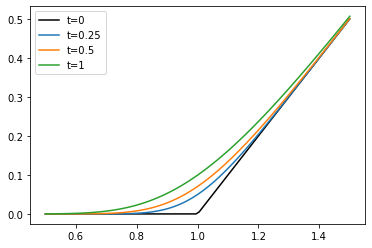

In [14]:
plt.plot(S, np.maximum(S - K, 0), label="t=0", color="black")

for t in T[1:]:
    plt.plot(S, [bs.BlackScholes(s, sigma).call_price(t, K) for s in S], label=f"t={t}")
    
plt.legend()
plt.show()

### Problem 2:  Replication

Consider the problem of replicating a European call option with an exercise time of $T$ and a strike price of $K$ in the Black-Scholes model. Assume that the replicating portfolio is rebalanced $n$ times (i.e. every $dt = T/n$ units of time). Using simulations, we estimate the distribution of the replication error.

1. It is necessary to generate $m$ random trajectories of price process trajectories on the segment $[0,t]$ with a step $dt = T/n$.
2. For each trajectory at each moment of time, find a replicating portfolio. Assume that the initial value of the portfolio is equal to the option price.
3. For each trajectory, calculate the difference between the value of the replicating portfolio at time $T$ and the payout to be made on the option.
4. Display the distribution of the obtained differences in the form of a histogram.

In [81]:
s = 1
sigma = 0.25
t = 0.25
k = 1.05
steps = 100 # number of rebalancing times
paths = 100

In [82]:
T = np.linspace(0, t, steps + 1)
bs_model = bs.BlackScholes(s, sigma)
call_price = bs_model.call_price(t, k)
print("Option price: ", call_price)

Option price:  0.029917742768226063


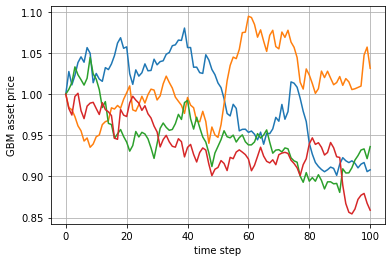

In [83]:
#Simulate and plot asset paths

S = bs_model.simulate(t, steps, paths)

plt.plot(S[:, 0])
plt.plot(S[:, 1])
plt.plot(S[:, 2])
plt.plot(S[:, 3])

plt.ylabel('GBM asset price')
plt.xlabel('time step')

plt.grid()
plt.show()

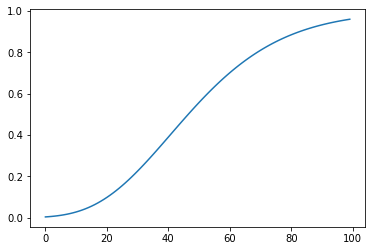

In [87]:
time_to_expiration = 1
k = 1
deltas = []
for s in np.linspace(0.5, 1.5, 100):
    bs_model = bs.BlackScholes(s, sigma=0.25)
    deltas.append(bs_model.call_delta(time_to_expiration, k))
    
plt.plot(deltas)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [00:01<00:00, 81.38it/s]


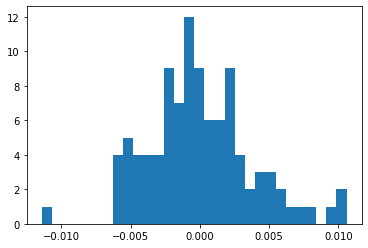

In [84]:
# Dynamic rebalancing portfolio

#sell call option, so our portfolio equals to its price
V = np.full(paths, call_price)

#simulate trajectories
S = bs_model.simulate(t, steps, paths)

for n in tqdm(range(paths)):
    for i in range(steps):
        bs_model = bs.BlackScholes(S[i,n], sigma)
        
        # time from T[i] to t
        time_to_expiration = t - T[i] 
        
        # recalculate delta of call option
        h = bs_model.call_delta(time_to_expiration, k)  
        
        # Value of portfolio changes on delta*dS, as we hold delta assets 
        V[n] += h * (S[i + 1, n] - S[i,n])
    
    # At expiration we need to pay on the call option
    V[n] -= max(S[-1, n] - k, 0)

plt.hist(V, bins=30)
plt.show()